# Telecommunication Company Customer Churn Rate Prediction
<hr>

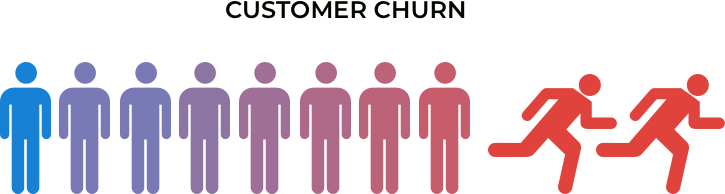

# Import all the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the data 

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# df['customerID'].nunique()

In [10]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

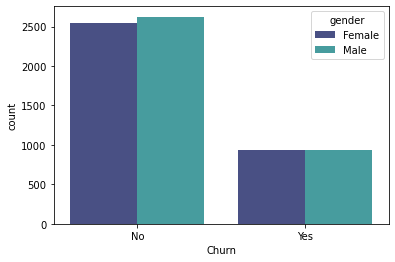

In [11]:
sns.countplot(x='Churn', data=df, hue='gender', palette = 'mako')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

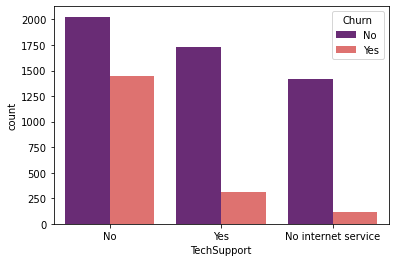

In [12]:
sns.countplot(x='TechSupport', data=df, hue='Churn', palette='magma')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

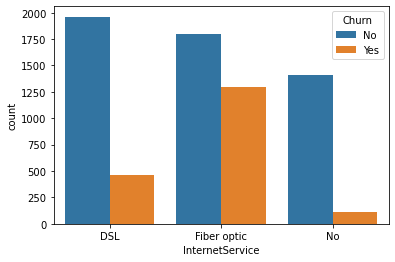

In [13]:
sns.countplot(x='InternetService', data = df, hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

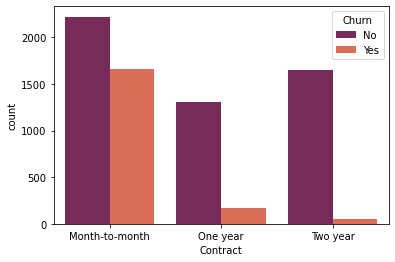

In [14]:
sns.countplot(x='Contract', data = df, hue='Churn', palette='rocket')

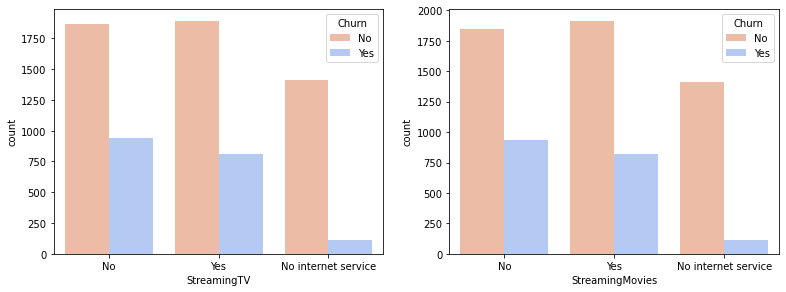

In [15]:
f, ax = plt.subplots(1,2, figsize = (13,4.5))
sns.countplot(x='StreamingTV', data = df, hue='Churn',palette = 'coolwarm_r', ax = ax[0])
sns.countplot(x='StreamingMovies', data = df, hue='Churn',palette = 'coolwarm_r', ax = ax[1])
plt.show()

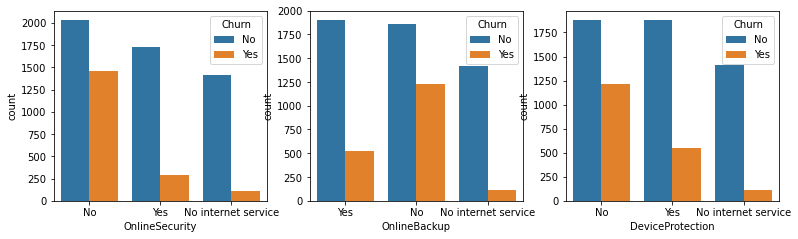

In [16]:
f, ax = plt.subplots(1,3, figsize = (13,3.5))

sns.countplot(x='OnlineSecurity', data = df, hue='Churn', ax = ax[0])
sns.countplot(x='OnlineBackup', data = df, hue='Churn', ax = ax[1])
sns.countplot(x='DeviceProtection', data = df, hue='Churn', ax = ax[2])
plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

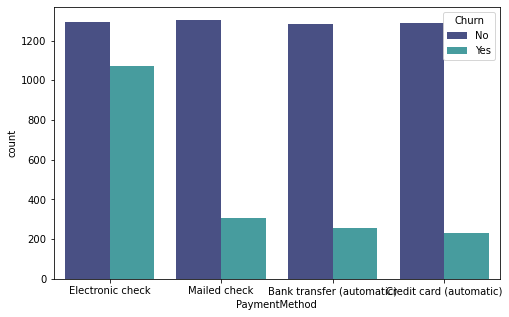

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(x='PaymentMethod', data = df, hue='Churn', palette = 'mako')

In [18]:
# sns.stripplot(x='Churn', y='tenure', data = df)

[Text(0.5, 0, 'Tenure in Months'), Text(0, 0.5, 'Count')]

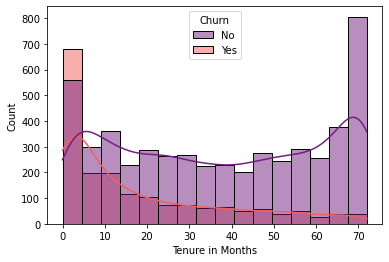

In [19]:
ax = sns.histplot(x='tenure', data = df, hue = 'Churn', kde = True, palette = 'magma')
ax.set(xlabel = "Tenure in Months", ylabel = "Count")

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

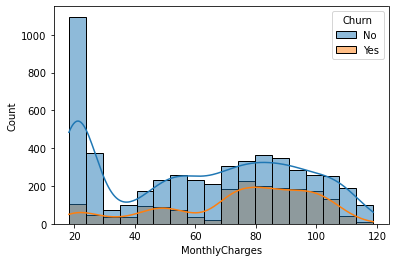

In [20]:
sns.histplot(x="MonthlyCharges", data = df, hue='Churn', kde = True)

# Data Preprocessing

In [21]:
df['customerID'].nunique()

7043

In [22]:
df = df.drop(['customerID'], axis = 1)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [25]:
columns_to_get_dummies = []

for i in X.columns:
    if X[i].nunique()<5:
        columns_to_get_dummies.append(i)


In [26]:
columns_to_get_dummies

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [27]:
X.replace({'No phone service':'No','No internet service':'No'},inplace=True)

In [28]:
df_with_dummies = pd.get_dummies(X, columns = columns_to_get_dummies, drop_first = True)
df_with_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.5,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


## Scaling the data 

In [29]:
from sklearn.preprocessing import StandardScaler 
columns_to_scale = ['tenure','MonthlyCharges']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_with_dummies[columns_to_scale])
df_with_dummies['tenure'] = df_scaled[:,0]
df_with_dummies['MonthlyCharges'] = df_scaled[:,1]
df_with_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,1889.5,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,1840.75,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [30]:
df_scale = df_with_dummies.drop(['TotalCharges'],axis = 1)

In [31]:
# plt.figure(figsize=(17,15))
# sns.heatmap(df_scale.corr(), annot = True, cmap = 'RdYlGn')

In [32]:
y=pd.get_dummies(y,drop_first=True)
y

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [33]:
df_preprocessed = df_scale.copy()

In [34]:
df_preprocessed['Churn'] = y
df_preprocessed.head()

,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.277445,-1.160323,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0.066327,-0.259629,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-1.236724,-0.362660,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.514251,-0.746535,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,-1.236724,0.197365,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


<AxesSubplot:>

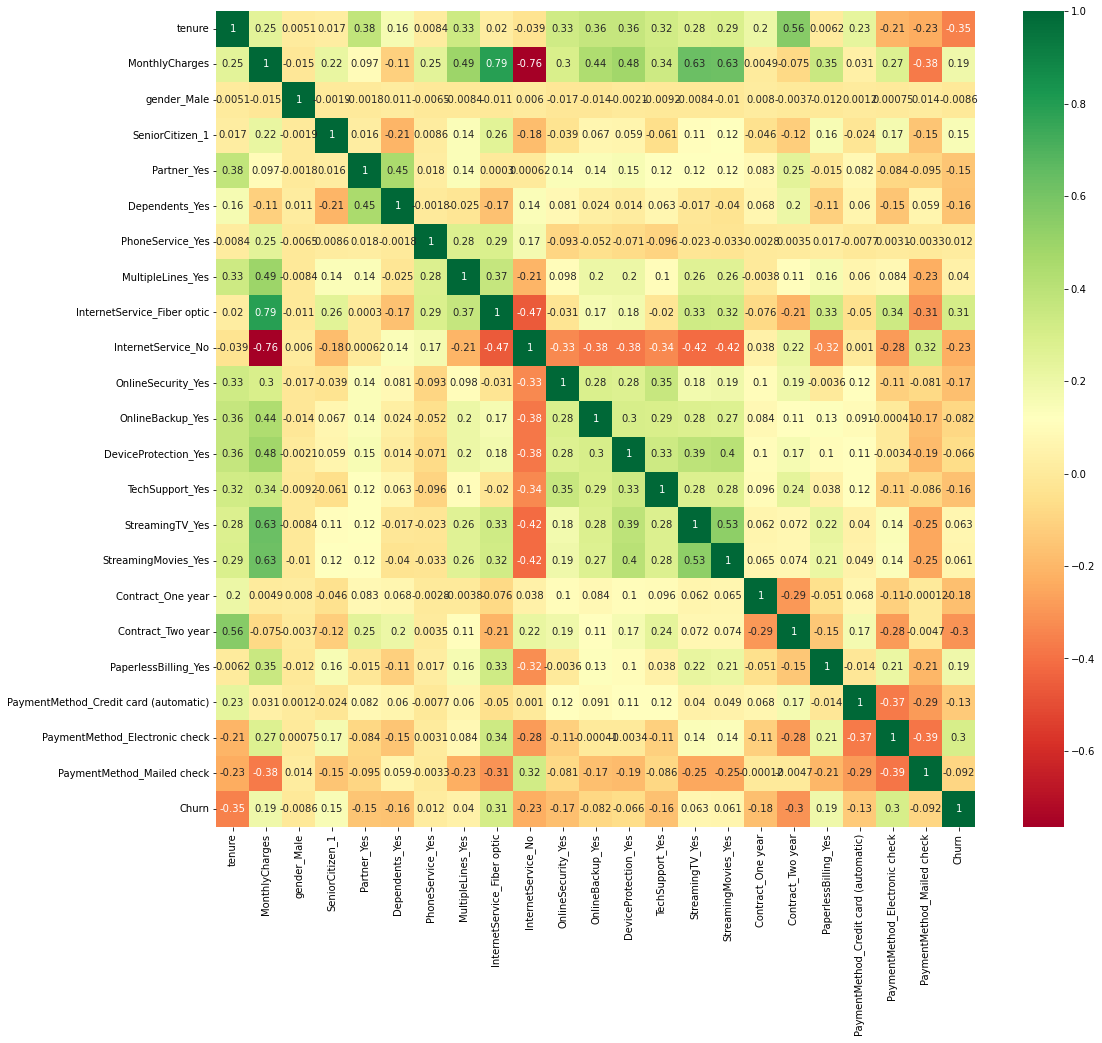

In [35]:
plt.figure(figsize=(17,15))
sns.heatmap(df_preprocessed.corr(), annot = True, cmap = 'RdYlGn')

In [36]:
X_preprocessed = df_preprocessed.drop(['Churn'], axis = 1)
y_preprocessed = df_preprocessed[['Churn']]

In [37]:
y_preprocessed.head()

,Churn
0,0
1,0
2,1
3,0
4,1


<AxesSubplot:xlabel='Churn', ylabel='count'>

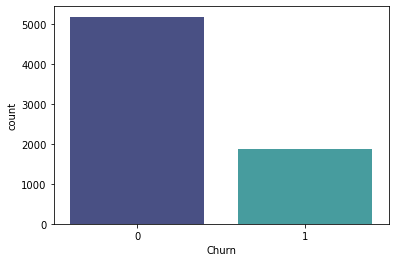

In [38]:
sns.countplot(x="Churn", data = y_preprocessed, palette = 'mako')

### Sampling 

In [39]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE()
X_sampled, y_sampled = smt.fit_resample(X_preprocessed, y_preprocessed)

<AxesSubplot:xlabel='Churn', ylabel='count'>

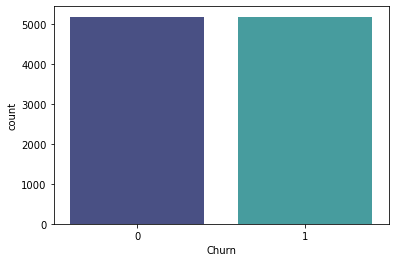

In [40]:
sns.countplot(x="Churn", data = y_sampled, palette = 'mako')

### Splitting the data into two datasets; training and testing data 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size = 0.33, random_state = 42)

# Model Building 

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
random_grid = {
                'penalty': ['l1','l2','elasticnet'],
                'C': [0.001,0.01,0.1,1,10,100]
}


log_reg = LogisticRegression()

lr_random = RandomizedSearchCV(estimator = log_reg, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
lr_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ..........................C=0.1, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalty=elasticnet; total time=   0.0s
[CV] END .........................C=0.01, penalt

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=42, verbose=2)

In [45]:
lr_random.best_params_

{'penalty': 'l2', 'C': 100}

In [46]:
best_lr = lr_random.best_estimator_

lr_predictions = best_lr.predict(X_test)

#### Accuracy

In [47]:
lr_accuracy = round(accuracy_score(y_test, lr_predictions)*100,2)
print(lr_accuracy)

81.02


#### Classification report

In [48]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1730
           1       0.80      0.82      0.81      1685

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



#### Confusion Matrix 

In [49]:
cm = confusion_matrix(y_test, lr_predictions , labels=[0,1])

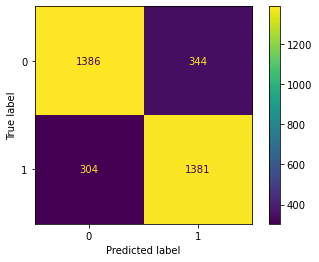

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Random Forest Classifier 

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
rfc_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

#### Accuracy

In [54]:
best_rfc = rfc_random.best_estimator_
rf_predictions = best_rfc.predict(X_test)
rfc_accuracy = round(accuracy_score(y_test, rf_predictions)*100,2)
print(rfc_accuracy)

83.89


#### Classification Report

In [55]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1730
           1       0.82      0.86      0.84      1685

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



#### Confusion Matrix

In [56]:
cm = confusion_matrix(y_test, rf_predictions , labels=[0,1])

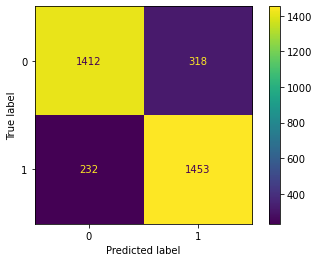

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Support Vector Machine

In [58]:
from sklearn.svm import SVC
param_grid = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
svc = RandomizedSearchCV(SVC(),param_grid,cv=5)

svc.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                  100]})

In [59]:
best_svc = svc.best_estimator_

In [60]:
svc_predictions = best_svc.predict(X_test)

#### Accuracy

In [61]:
svc_accuracy = round(accuracy_score(y_test, svc_predictions)*100,2)
print(svc_accuracy)

83.05


#### Classification Report

In [62]:
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1730
           1       0.82      0.83      0.83      1685

    accuracy                           0.83      3415
   macro avg       0.83      0.83      0.83      3415
weighted avg       0.83      0.83      0.83      3415



#### Confusion Matrix

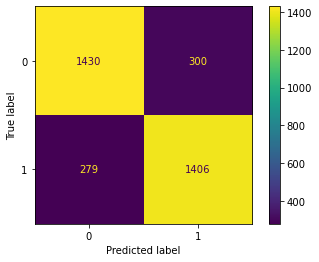

In [63]:
cm = confusion_matrix(y_test, svc_predictions, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Feature Importance

In [64]:
best_rfc.feature_importances_

array([0.23612349, 0.17182622, 0.02194838, 0.01291002, 0.02380498,
       0.02195913, 0.00766879, 0.01555407, 0.06450906, 0.03201866,
       0.0387634 , 0.02590892, 0.0171654 , 0.03414536, 0.01487659,
       0.01541293, 0.05834738, 0.09792785, 0.01984966, 0.01749024,
       0.04024619, 0.01154327])

<AxesSubplot:>

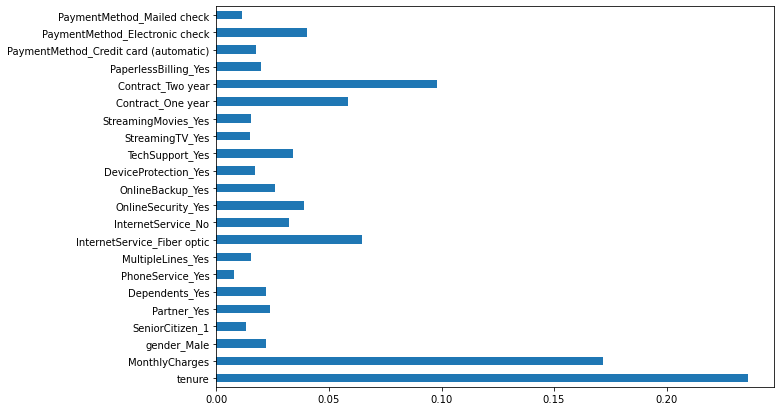

In [65]:
plt.figure(figsize=(10,7))
pd.Series(best_rfc.feature_importances_, index=X_preprocessed.columns).plot(kind='barh')

## Plot ROC and compare AUC

In [66]:
from sklearn.metrics import roc_curve, auc

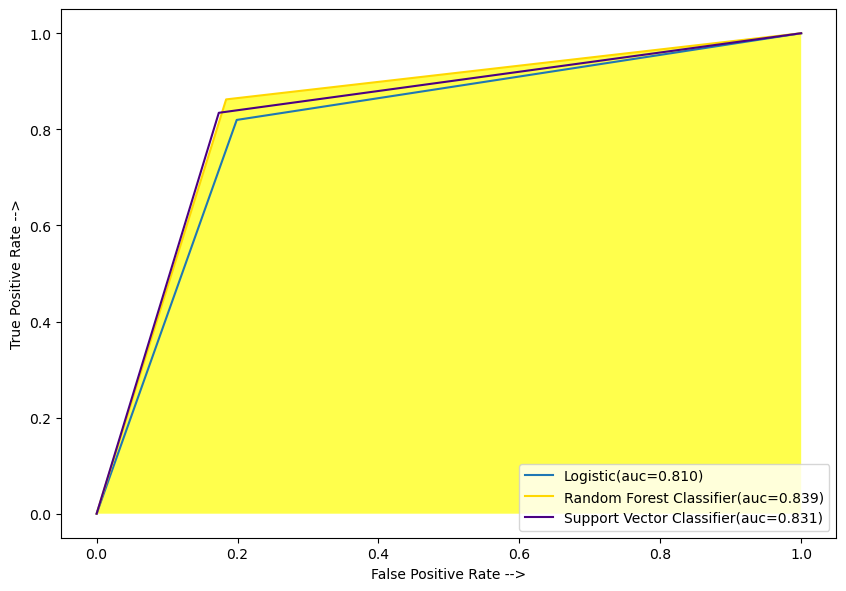

In [67]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lr_predictions)
auc_logistic = auc(logistic_fpr, logistic_tpr)

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, rf_predictions)
auc_random_forest = auc(rfc_fpr, rfc_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, svc_predictions)
auc_svc = auc(svc_fpr, svc_tpr)


plt.figure(figsize=(10,7), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label = 'Logistic(auc=%0.3f)' % auc_logistic)

plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label = 'Random Forest Classifier(auc=%0.3f)' % auc_random_forest, color='gold')

plt.plot(svc_fpr, svc_tpr, linestyle='-', label = 'Support Vector Classifier(auc=%0.3f)' % auc_svc, color='indigo')

if (auc_logistic > auc_random_forest) & (auc_logistic > auc_svc):
    plt.fill_between(logistic_fpr, logistic_tpr, facecolor='lightgreen', alpha=0.7)
elif (auc_random_forest > auc_logistic) & (auc_random_forest > auc_svc):
    plt.fill_between(rfc_fpr, rfc_tpr, facecolor='yellow', alpha=0.7)
else:
    plt.fill_between(svc_fpr, svc_tpr, facecolor='#9999FF', alpha=0.7)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

### Finding the Best Performing Models 

In [68]:
best_model = pd.DataFrame({
                            'Model' : ['Logistic Regression', 'Random Forest', 'Support Vector Classifier'],
                            'Accuracy' : [lr_accuracy, rfc_accuracy, svc_accuracy]
})

In [69]:
best_model.sort_values(by=['Accuracy'], ascending = False)

,Model,Accuracy
1,Random Forest,83.89
2,Support Vector Classifier,83.05
0,Logistic Regression,81.02


> **Random Forest** is our **best model** with an **accuracy** of **83.89 %**

## Saving the best model 

In [71]:
model = rfc_random.best_estimator_
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='auto',
                       min_samples_leaf=2, n_estimators=2000)

In [72]:
model_predictions = model.predict(X_test)
model_accuracy = round(accuracy_score(y_test, model_predictions)*100,2)
print(model_accuracy)

83.87


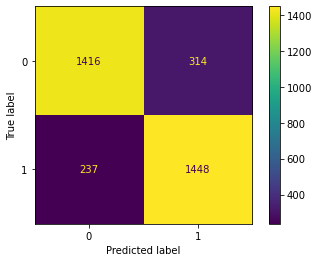

In [73]:
cm = confusion_matrix(y_test, model_predictions, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [74]:
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1730
           1       0.82      0.86      0.84      1685

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



In [75]:
import pickle
with open('Best Model','wb') as file:
    pickle.dump(model,file)